In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from IPython import get_ipython
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv('iit_nit_data.csv')

In [3]:
data.head()


,id,year,institute_type,round_no,quota,pool,institute_short,program_name,program_duration,degree_short,category,opening_rank,closing_rank,is_preparatory
0,1,2016,IIT,6,AI,Gender-Neutral,IIT-Bombay,Aerospace Engineering,4 Years,B.Tech,GEN,838,1841,0
1,2,2016,IIT,6,AI,Gender-Neutral,IIT-Bombay,Aerospace Engineering,4 Years,B.Tech,OBC-NCL,408,1098,0
2,3,2016,IIT,6,AI,Gender-Neutral,IIT-Bombay,Aerospace Engineering,4 Years,B.Tech,SC,297,468,0
3,4,2016,IIT,6,AI,Gender-Neutral,IIT-Bombay,Aerospace Engineering,4 Years,B.Tech,ST,79,145,0
4,5,2016,IIT,6,AI,Gender-Neutral,IIT-Bombay,Aerospace Engineering,4 Years,B.Tech,GEN-PWD,94,94,0


In [4]:
data.tail()

,id,year,institute_type,round_no,quota,pool,institute_short,program_name,program_duration,degree_short,category,opening_rank,closing_rank,is_preparatory
64953,31136,2021,NIT,1,JK,Female-Only,NIT-Srinagar,Electronics and Communication Engineering,4 Years,B.Tech,SC,14185,24048,0
64954,31137,2021,NIT,1,JK,Gender-Neutral,NIT-Srinagar,Electronics and Communication Engineering,4 Years,B.Tech,ST,2736,4171,0
64955,31138,2021,NIT,1,JK,Female-Only,NIT-Srinagar,Electronics and Communication Engineering,4 Years,B.Tech,ST,10870,10870,0
64956,31139,2021,NIT,1,LA,Gender-Neutral,NIT-Srinagar,Electronics and Communication Engineering,4 Years,B.Tech,GEN,166453,265454,0
64957,31140,2021,NIT,1,LA,Female-Only,NIT-Srinagar,Electronics and Communication Engineering,4 Years,B.Tech,GEN,215054,215054,0


In [5]:
data.shape

(64958, 14)

In [6]:
data.columns

Index(['id', 'year', 'institute_type', 'round_no', 'quota', 'pool',
       'institute_short', 'program_name', 'program_duration', 'degree_short',
       'category', 'opening_rank', 'closing_rank', 'is_preparatory'],
      dtype='object')

In [7]:
data.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
64953     True
64954     True
64955     True
64956     True
64957     True
Length: 64958, dtype: bool

In [8]:
data.duplicated().sum()

39500

In [9]:
data.isnull().sum()

id                  0
year                0
institute_type      0
round_no            0
quota               0
pool                0
institute_short     0
program_name        0
program_duration    0
degree_short        0
category            0
opening_rank        0
closing_rank        0
is_preparatory      0
dtype: int64

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64958 entries, 0 to 64957
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                64958 non-null  int64 
 1   year              64958 non-null  int64 
 2   institute_type    64958 non-null  object
 3   round_no          64958 non-null  int64 
 4   quota             64958 non-null  object
 5   pool              64958 non-null  object
 6   institute_short   64958 non-null  object
 7   program_name      64958 non-null  object
 8   program_duration  64958 non-null  object
 9   degree_short      64958 non-null  object
 10  category          64958 non-null  object
 11  opening_rank      64958 non-null  int64 
 12  closing_rank      64958 non-null  int64 
 13  is_preparatory    64958 non-null  int64 
dtypes: int64(6), object(8)
memory usage: 6.9+ MB


In [11]:
data.describe()

,id,year,round_no,opening_rank,closing_rank,is_preparatory
count,64958.000000,64958.000000,64958.000000,6.495800e+04,6.495800e+04,64958.000000
mean,18171.173389,2020.421580,2.609348,8.259642e+03,1.070497e+04,0.047631
std,9619.123659,1.149762,2.422558,2.679448e+04,3.788101e+04,0.212985
min,1.000000,2016.000000,1.000000,0.000000e+00,0.000000e+00,0.000000
25%,10378.000000,2020.000000,1.000000,6.710000e+02,8.320000e+02,0.000000
50%,13084.500000,2021.000000,1.000000,2.309000e+03,2.764500e+03,0.000000
75%,28434.000000,2021.000000,6.000000,6.932000e+03,8.190000e+03,0.000000
max,31140.000000,2021.000000,7.000000,1.082601e+06,1.144790e+06,1.000000


In [12]:
data.nunique()

id                  25458
year                    6
institute_type          2
round_no                4
quota                   7
pool                    2
institute_short        54
program_name          130
program_duration        2
degree_short           13
category               10
opening_rank        10984
closing_rank        11940
is_preparatory          2
dtype: int64

In [13]:
data_cat = data[['year', 'institute_type', 'institute_short',
'round_no', 'quota','pool', 'program_duration',
'degree_short', 'category',
'is_preparatory']]

In [14]:
for i in data_cat.columns:
    print(data_cat[i].unique())


[2016 2017 2018 2019 2020 2021]
['IIT' 'NIT']
['IIT-Bombay' 'IIT-Delhi' 'IIT-Kharagpur' 'IIT-Kanpur' 'IIT-Madras'
 'IIT-Roorkee' 'IIT-Guwahati' 'IIT-Indore' 'IIT-Hyderabad'
 'IIT-(BHU) Varanasi' 'IIT-Patna' 'IIT-(ISM) Dhanbad' 'IIT-Bhubaneswar'
 'IIT-Mandi' 'IIT-Gandhinagar' 'IIT-Ropar' 'IIT-Jodhpur' 'IIT-Tirupati'
 'IIT-Bhilai' 'IIT-Dharwad' 'IIT-Goa' 'IIT-Jammu' 'IIT-Palakkad'
 'NIT-Warangal' 'NIT-Tiruchirappalli' 'NIT-Uttarakhand' 'NIT-Surat'
 'NIT-Nagpur' 'NIT-Andhra-Pradesh' 'NIT-Jalandhar' 'NIT-Jaipur'
 'NIT-Bhopal' 'NIT-Allahabad' 'NIT-Calicut' 'NIT-Agartala' 'NIT-Delhi'
 'NIT-Durgapur' 'NIT-Goa' 'NIT-Hamirpur' 'NIT-Meghalaya'
 'NIT-Karnataka-Surathkal' 'NIT-Patna' 'NIT-Nagaland' 'NIT-Puducherry'
 'NIT-Raipur' 'NIT-Sikkim' 'NIT-Arunachal-Pradesh' 'NIT-Jamshedpur'
 'NIT-Kurukshetra' 'NIT-Manipur' 'NIT-Mizoram' 'NIT-Rourkela'
 'NIT-Silchar' 'NIT-Srinagar']
[6 7 1 2]
['AI' 'HS' 'OS' 'AP' 'GO' 'JK' 'LA']
['Gender-Neutral' 'Female-Only']
['4 Years' '5 Years']
['B.Tech' 'BSc' 'B.Tech 

In [15]:
for i in data_cat.columns:
    print(data_cat[i].value_counts())

2021    47400
2020     6604
2019     6254
2018     1917
2016     1578
2017     1205
Name: year, dtype: int64
IIT    32905
NIT    32053
Name: institute_type, dtype: int64
IIT-Kharagpur              5865
IIT-Delhi                  2953
IIT-Bombay                 2879
NIT-Rourkela               2869
IIT-Roorkee                2739
IIT-Madras                 2454
IIT-Kanpur                 2424
IIT-(BHU) Varanasi         2293
NIT-Raipur                 2053
NIT-Hamirpur               1906
NIT-Calicut                1900
NIT-Karnataka-Surathkal    1787
NIT-Bhopal                 1739
NIT-Jalandhar              1724
NIT-Durgapur               1670
NIT-Agartala               1631
NIT-Allahabad              1575
IIT-(ISM) Dhanbad          1504
NIT-Jaipur                 1479
NIT-Jamshedpur             1290
NIT-Kurukshetra            1272
IIT-Bhubaneswar            1232
NIT-Patna                  1213
IIT-Hyderabad              1139
IIT-Guwahati               1131
NIT-Silchar                111

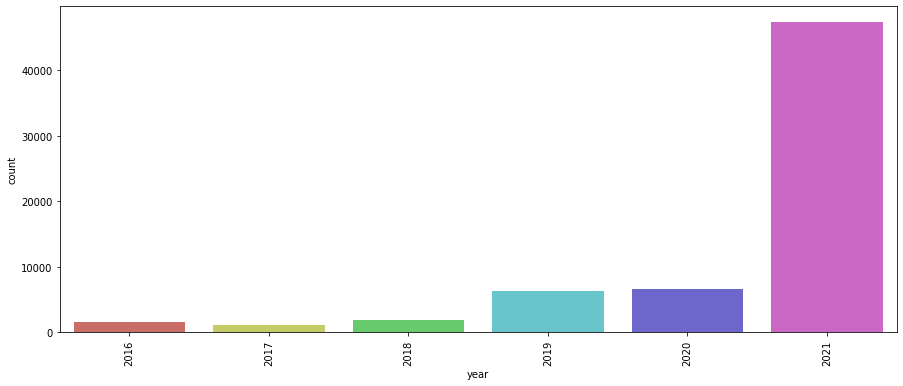

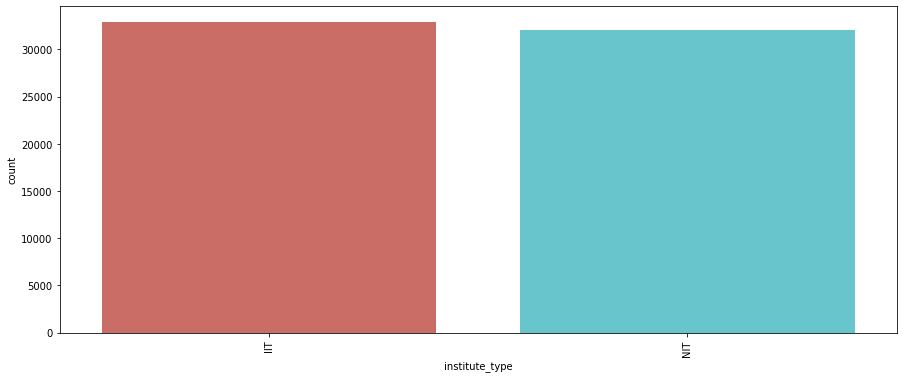

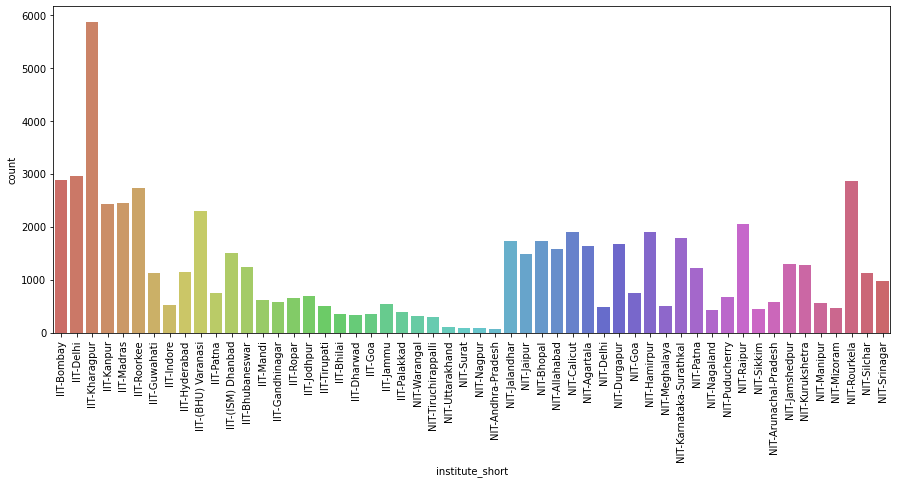

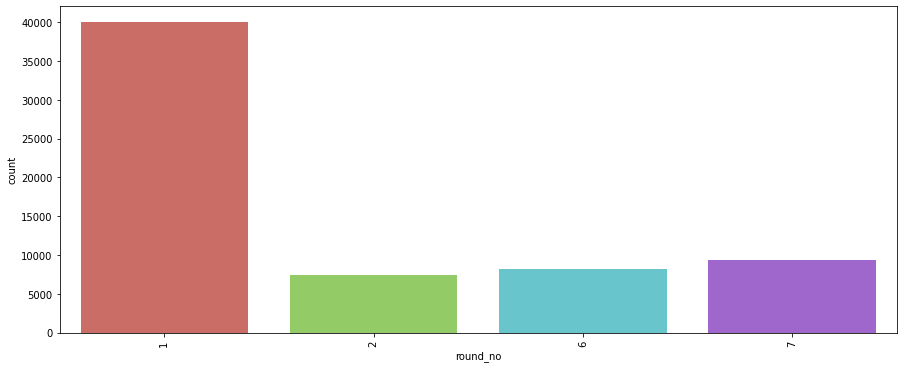

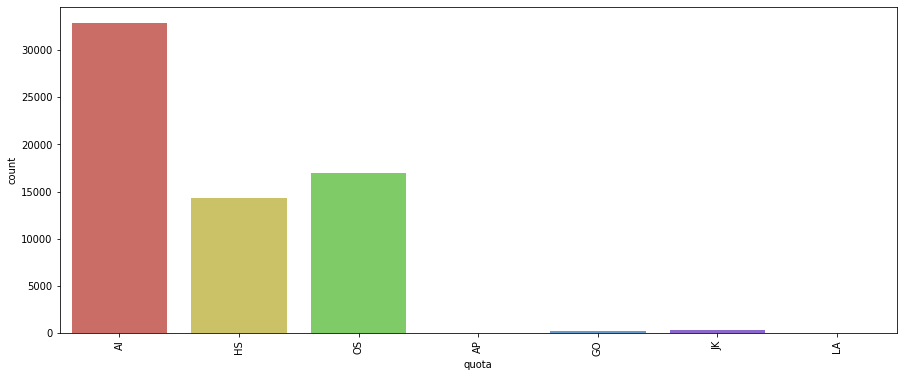

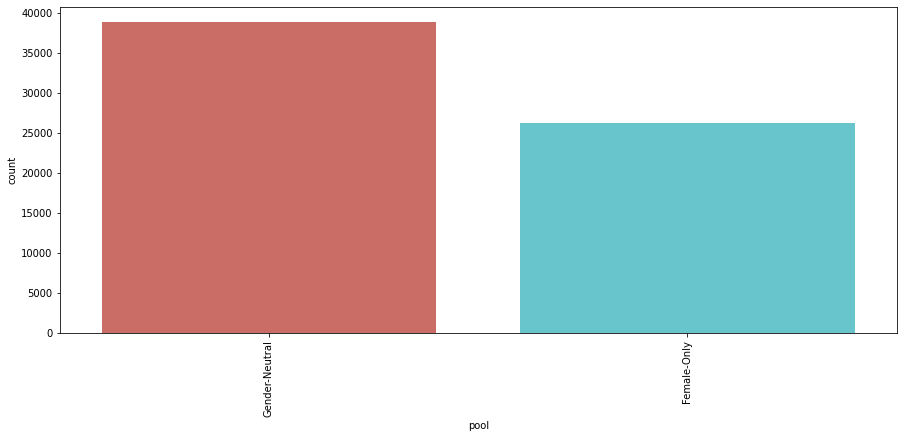

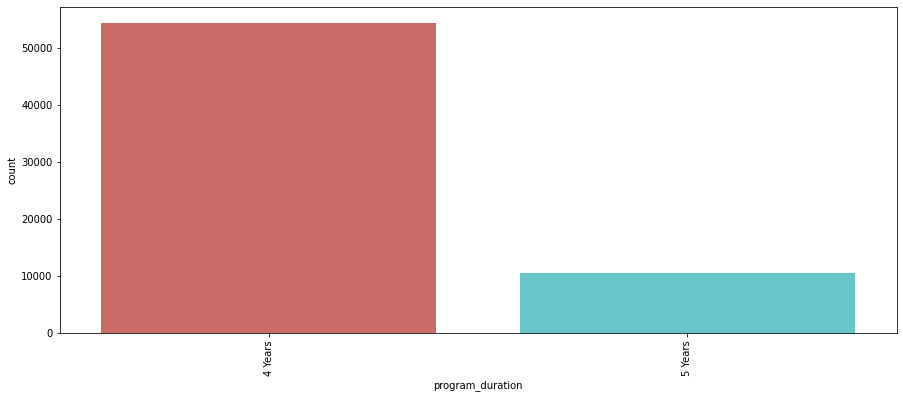

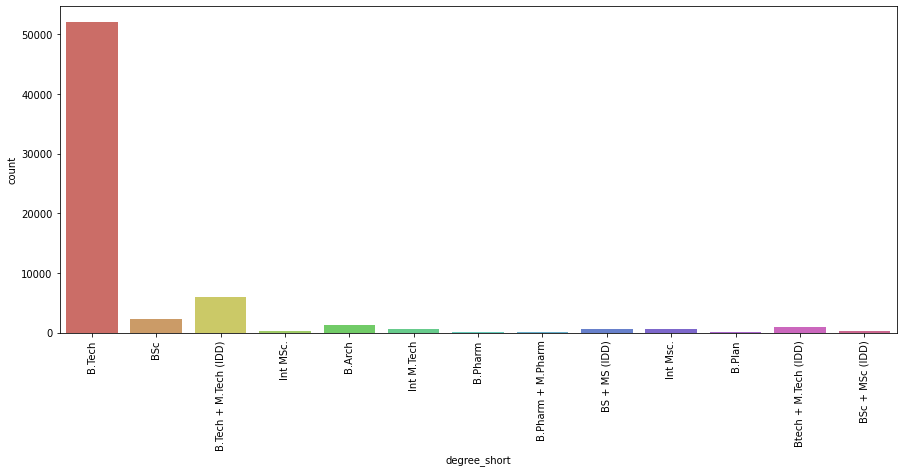

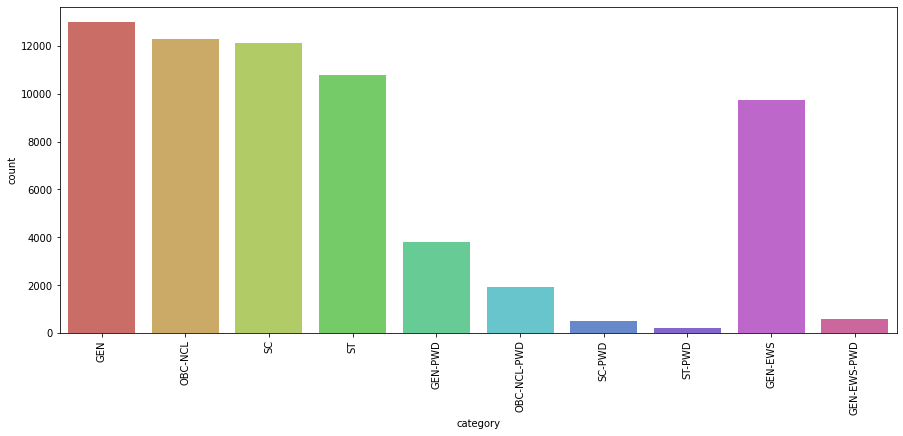

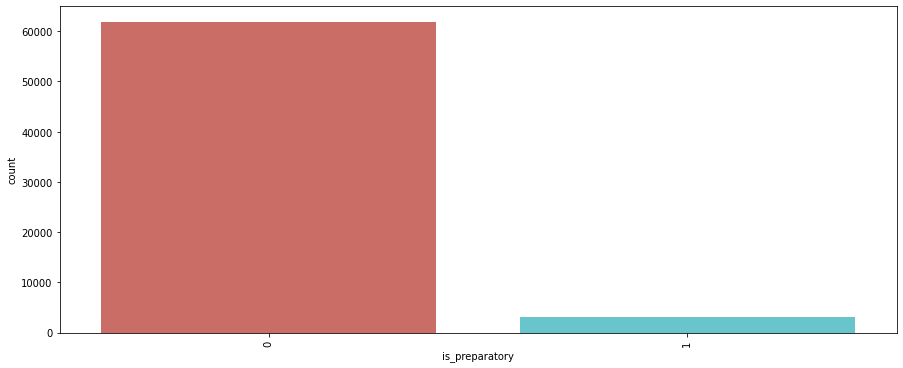

In [16]:
for i in data_cat.columns:
    plt.figure(figsize=(15,6))
    sns.countplot(data_cat[i], data = data_cat,
    palette = 'hls')
    plt.xticks(rotation = 90)
    plt.show()

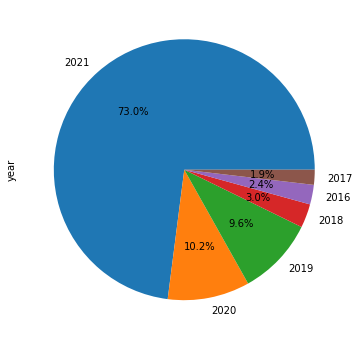

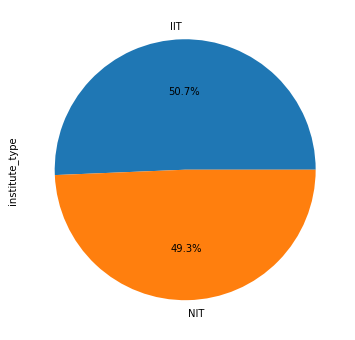

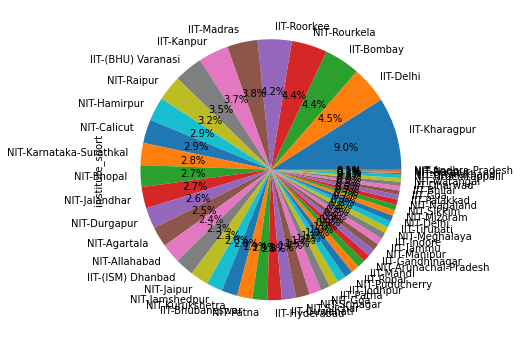

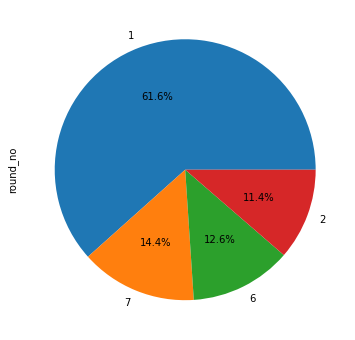

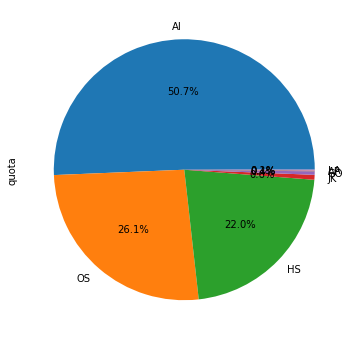

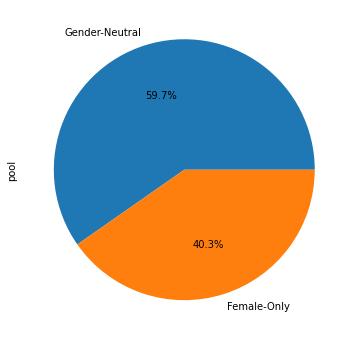

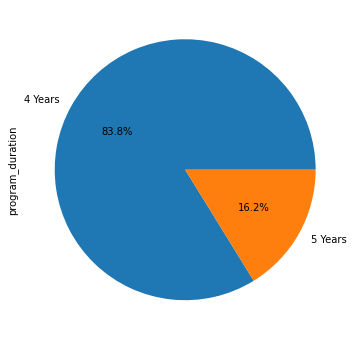

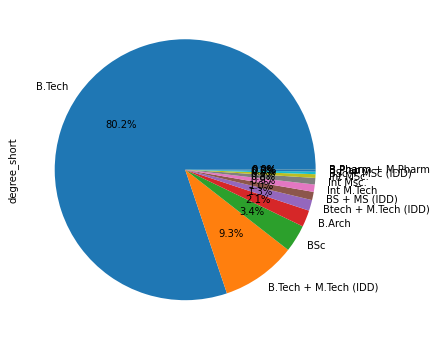

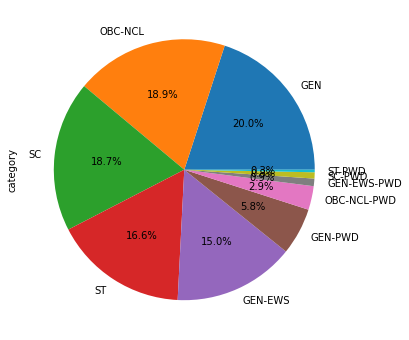

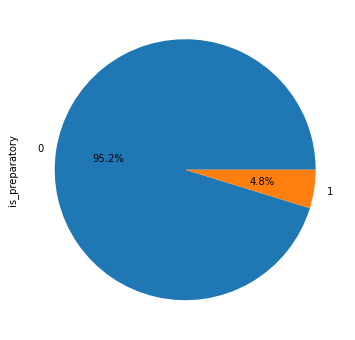

In [17]:
for i in data_cat.columns:
    plt.figure(figsize=(15,6))
    data_cat[i].value_counts().plot(kind = 'pie',
    autopct = '%1.1f%%')
    plt.xticks(rotation = 90)
    plt.show()


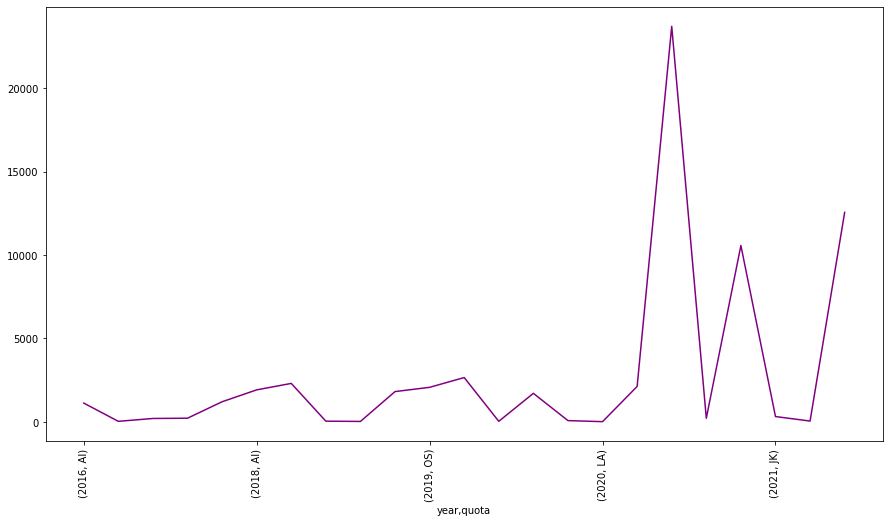

In [18]:
plt.figure(figsize=(15,8))
data_year_quota = data.groupby(['year', 'quota']).size().plot(kind = 'line',color = 'purple')
plt.xticks(rotation = 90)
plt.show()

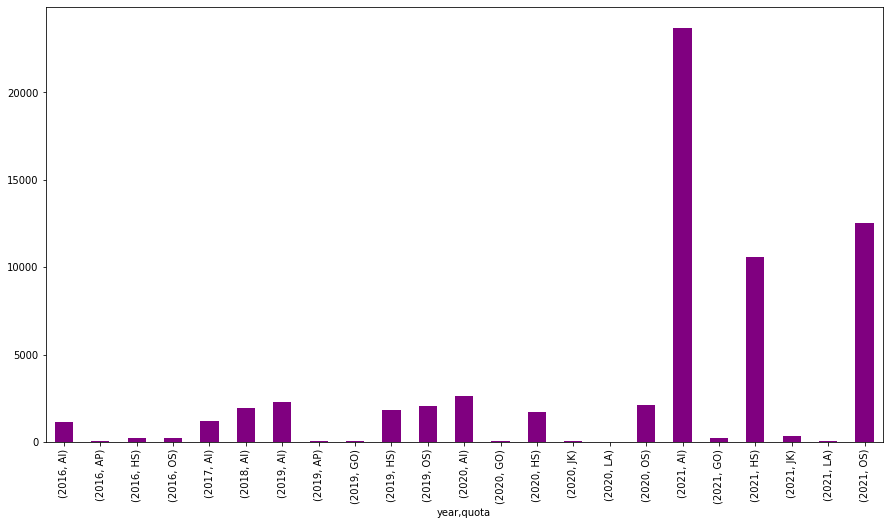

In [19]:
plt.figure(figsize=(15,8))
data_year_quota = data.groupby(['year', 'quota']).size().plot(kind = 'bar',color = 'purple')
plt.xticks(rotation = 90)
plt.show()


In [20]:
avg_opening_rank = data['opening_rank'].mean(axis = 0)
avg_open_rank = round(avg_opening_rank)
print("Average opening rank over the years has been:", avg_open_rank)

Average opening rank over the years has been: 8260


In [21]:
min_opening_rank = data['opening_rank'].min()
max_opening_rank = data['opening_rank'].max()
print("Minimum Opening Rank:", min_opening_rank, " Maximum Opening Rank:", max_opening_rank)

Minimum Opening Rank: 0  Maximum Opening Rank: 1082601


In [ ]:
plt.figure(figsize=(15,8))
data_year_rank = data.groupby(['year', 'opening_rank']).opening_rank.count().plot(kind = 'bar',color = 'purple')
plt.xticks(rotation = 90)
plt.show()

KeyboardInterrupt: 

In [28]:
plt.figure(figsize=(15,8))
data_year_rank = data.groupby(['year', 'closing_rank']).closing_rank.count().plot(kind = 'bar',color = 'purple')
plt.xticks(rotation = 90)
plt.show()

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x0000026CEE98BE18> (for post_execute):


KeyboardInterrupt: 

In [ ]:
avg_closing_rank = round(data['closing_rank'].mean(axis = 0))
print("Average closing rank over the years has been:", avg_closing_rank)